## pd.describe()

In [12]:
import numpy as np
import pandas as pd

df = pd.DataFrame(np.random.randn(10000,5)*100, columns=[list('abcde')])
df.head()

,a,b,c,d,e
0,-57.694154,51.022691,55.135468,-137.569163,-193.404842
1,-101.513443,-264.236042,-61.501425,0.167552,15.083296
2,37.430076,-112.415918,-63.946522,-102.900660,30.834766
3,-155.041647,-140.479739,198.225348,-89.868786,191.700222
4,-155.285098,116.131049,60.394458,20.660252,64.532177


In [13]:
df.describe()

,a,b,c,d,e
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.024859,-0.097465,0.223025,0.377145,-0.261873
std,100.020930,99.999506,100.410441,100.372831,99.599318
min,-381.211009,-379.196488,-413.434698,-343.612351,-382.448203
25%,-65.155963,-67.643664,-68.243681,-66.788601,-66.925466
50%,0.329788,-0.705752,0.264011,0.879680,0.255927
75%,68.010080,67.202662,68.650497,67.464089,66.941882
max,341.399836,393.457160,344.111469,380.098274,372.040176


## example

In [38]:
popdensity = pd.read_csv("各鄉鎮市區人口密度.csv")
display(popdensity.head())

# column name
popdensity.columns = popdensity.loc[0]
popdensity.drop(0, inplace=True)
display(popdensity.head())

# remove unwanted rows - filter
popdensity = popdensity[popdensity['統計年'] == '107']
display(popdensity[-10:])

# transform number string into number (note non number values, use try except)
def convertInt(s):
    try:
        return int(s)
    except:
        return 0
    
def convertFloat(s):
    try:
        return float(s)
    except:
        return 0
    
popdensity[['年底人口數','人口密度']] = popdensity[['年底人口數','人口密度']].applymap(convertInt)
popdensity[['土地面積']] = popdensity[['土地面積']].applymap(convertFloat)

display(popdensity[-10:])
print(popdensity.dtypes)

,statistic_yyy,site_id,people_total,area,population_density
0,統計年,區域別,年底人口數,土地面積,人口密度
1,107,新北市板橋區,554742,23.1373,23976
2,107,新北市三重區,385826,16.317,23646
3,107,新北市中和區,412486,20.144,20477
4,107,新北市永和區,221098,5.7138,38695


,統計年,區域別,年底人口數,土地面積,人口密度
1,107,新北市板橋區,554742,23.1373,23976
2,107,新北市三重區,385826,16.317,23646
3,107,新北市中和區,412486,20.144,20477
4,107,新北市永和區,221098,5.7138,38695
5,107,新北市新莊區,417754,19.7383,21165


,統計年,區域別,年底人口數,土地面積,人口密度
361,107,金門縣金沙鎮,20784,41.19,505
362,107,金門縣金寧鄉,31765,29.854,1064
363,107,金門縣烈嶼鄉,12861,16.003,804
364,107,金門縣烏坵鄉,682,1.2,568
365,107,連江縣南竿鄉,7663,10.4,737
366,107,連江縣北竿鄉,2425,9.9,245
367,107,連江縣莒光鄉,1618,4.7,344
368,107,連江縣東引鄉,1350,3.8,355
369,107,東沙群島,…,2.38,…
370,107,南沙群島,…,0.5045,…


,統計年,區域別,年底人口數,土地面積,人口密度
361,107,金門縣金沙鎮,20784,41.1900,505
362,107,金門縣金寧鄉,31765,29.8540,1064
363,107,金門縣烈嶼鄉,12861,16.0030,804
364,107,金門縣烏坵鄉,682,1.2000,568
365,107,連江縣南竿鄉,7663,10.4000,737
366,107,連江縣北竿鄉,2425,9.9000,245
367,107,連江縣莒光鄉,1618,4.7000,344
368,107,連江縣東引鄉,1350,3.8000,355
369,107,東沙群島,0,2.3800,0
370,107,南沙群島,0,0.5045,0


0
統計年       object
區域別       object
年底人口數      int64
土地面積     float64
人口密度       int64
dtype: object


In [39]:
popdensity.describe()

,年底人口數,土地面積,人口密度
count,370.000000,370.000000,370.000000
mean,63753.870270,97.829911,2750.478378
std,83189.285172,179.833241,5560.937144
min,0.000000,0.504500,0.000000
25%,14448.250000,29.631850,222.750000
50%,30663.000000,53.416900,626.000000
75%,77915.500000,89.554225,1927.750000
max,554742.000000,1641.855500,38695.000000


In [44]:
popdensity[['年底人口數','土地面積','人口密度']].apply(lambda s:pd.Series([s.max(),s.min()]))

,年底人口數,土地面積,人口密度
0,554742,1641.8555,38695
1,0,0.5045,0


## set_index() - take a certain column to be index

In [43]:
popdensity.set_index('區域別')  # non mutating

,統計年,年底人口數,土地面積,人口密度
區域別,,,,
新北市板橋區,107,554742,23.1373,23976
新北市三重區,107,385826,16.3170,23646
新北市中和區,107,412486,20.1440,20477
新北市永和區,107,221098,5.7138,38695
新北市新莊區,107,417754,19.7383,21165
...,...,...,...,...
連江縣北竿鄉,107,2425,9.9000,245
連江縣莒光鄉,107,1618,4.7000,344
連江縣東引鄉,107,1350,3.8000,355


# Covariance and Correlation

In [50]:
%matplotlib notebook
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

data = {'年廣告費投入':[12.5, 15.3, 23.2, 26.4, 33.5, 34.4, 39.4, 45.2, 55.4, 60.9],
            '月均銷售額':[21.2, 23.9, 32.9, 34.1, 42.5, 43.2, 49.0, 52.8, 59.4, 63.5]}
dataFrame = pd.DataFrame(data, index=[2020,2019,2018,2017,2016,2015,2014,2013,2012,2011])

dataFrame

,年廣告費投入,月均銷售額
2020,12.5,21.2
2019,15.3,23.9
2018,23.2,32.9
2017,26.4,34.1
2016,33.5,42.5
2015,34.4,43.2
2014,39.4,49.0
2013,45.2,52.8
2012,55.4,59.4
2011,60.9,63.5


[[12.5 21.2]
 [15.3 23.9]
 [23.2 32.9]
 [26.4 34.1]
 [33.5 42.5]
 [34.4 43.2]
 [39.4 49. ]
 [45.2 52.8]
 [55.4 59.4]
 [60.9 63.5]]


<IPython.core.display.Javascript object>


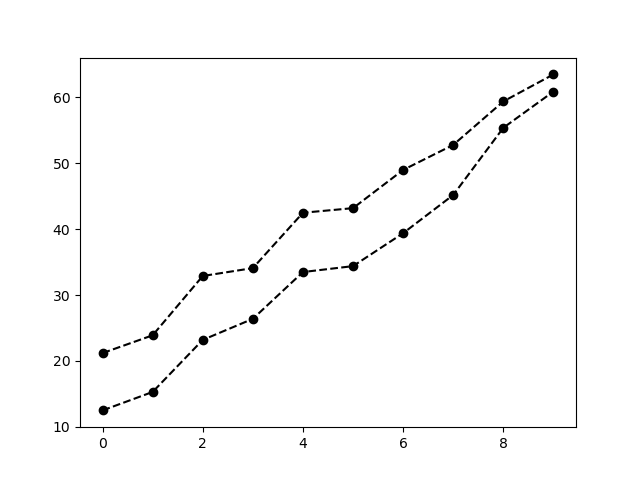

In [52]:
print(dataFrame.values)
plt.plot(dataFrame.values, 'ko--')   # see that 2D array can be plotted into two separate lines as easily as this!

### Correlation -  corr

In [55]:
dataFrame['年廣告費投入'].corr(dataFrame['月均銷售額'])

0.9941983762371884

### Covariance - cov

In [60]:
dataFrame['年廣告費投入'].cov(dataFrame['月均銷售額'])

228.01555555555558

In [59]:
popdensity.corr()

,年底人口數,土地面積,人口密度
0,,,
年底人口數,1.000000,-0.193214,0.651047
土地面積,-0.193214,1.000000,-0.205875
人口密度,0.651047,-0.205875,1.000000
